# Titanic tutorial


일반적인 Kaggle 데이터 분석은 다음과 같은 단계로 진행됩니다.
1. 문제 정의
2. 데이터 준비
3. 데이터 전처리
4. 탐색적 자료 분석
5. 모델 적합 및 예측
6. 시각화 및 보고서 작성
7. 결과 제출  

이를 모두 지켜 진행 할 필요는 없으며,  
상황에 맞춰 유동적으로 진행하시면 됩니다.

이 커널에서는 아래와 같은 순서로 진행하도록 하겠습니다.  

##  WorkFlow
1. 데이터 셋 확인
 - 데이터의 타입이 어떻게 구성돼 있는지 확인합니다.
 - 모든 값이 존재하는지 여부를 파악합니다.
2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)
 - 데이터들 사이의 관계를 파악합니다.
 - 특별하고 이상한 값은 없는지 확인합니다. 
3. 특성 공학(Feature Engineering)
 - 값을 채워 넣거나 특이점 있는 부분을 수정합니다.
 - 데이터를 잘 설명할 수 있는 새로운 변수를 생성합니다.
 - 모델에 적합하기 좋은 형태로 만듭니다.
4. 모델 생성 및 학습
 - 적합할 모델을 만들고 학습합니다.
5. 모델 예측 및 평가
 - 학습 된 모델을 통해 새로운 데이터의 값을 예측 및 평가합니다.
 
## Reference

이 글은 아래의 커널 및 영상을 참고하여 작성 하였습니다.  
- [Titanic Data Science Solutions](www.kaggle.com/startupsci/titanic-data-science-solutions)
- [[GUIDE, KOR, DG] 데이터 분석 어떻게 시작해야 하나요?](https://www.kaggle.com/daehungwak/guide-kor-dg)
- [타이타닉 튜토리얼](https://kaggle-kr.tistory.com/17?category=868316)
- [[수비니움 캐글 따라하기]](https://www.youtube.com/watch?v=bGGnlvsS8ao)
- [EDA To Prediction(DieTanic)](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)
---

## 1. 데이터 셋 확인  

우리가 다룰 데이터는 [Titanic](https://www.kaggle.com/c/titanic) 입니다.  
Titanic은 2200여명의 승선자 중 1500여명이 사망한 기록을 담은 데이터입니다.    
탑승객의 이름, 성별, 나이 등을 기록을 통해  
이를 통해 생존 여부를 예측하는 것이 목표 입니다.  

데이터를 불러오기 앞서 필요한 도구들을 불러옵니다.
- 데이터 분석용 : numpy, pandas
- 데이터 시각화 : seaborn, matplotlib, missingno
- 모델 적합 및 예측 : sklearn

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(font_scale = 2)
# 그래프의 기본 스타일과 font크기를 설정하는 코드입니다.

In [105]:
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic') # 그래프 한글 표시 깨짐 방지
mpl.rc('axes', unicode_minus = False) # 그래프 minus 표시 깨짐 방지

데이터를 불러 오도록 하겠습니다.

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [4]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


train 데이터의 경우  
891개의 행과 12개의 변수를 가지고 있습니다.

In [5]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


test 데이터의 경우  
418개의 행과 11개의 변수를 가지고 있습니다.

train과 test에서 변수의 개수 차이가 존재하는데요.  
이는 우리가 예측해야 할 Survived 변수가 빠져있기 때문입니다.

In [41]:
df_train.info()
print('-'*20)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare        

다음은 우리가 분석에 사용할  
변수 설명입니다.

__변수 설명__
- Survival : 생존 여부(0 = 사망, 1 = 생존)
- Pclass : 티켓 등급(1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex : 성별
- Age : 나이
- SibSp : 함께 탑승한 형제/자매 또는 배우자 수
- Parch : 함께 탑승한 부모 또는 자녀 수
- Ticket : 티켓 번호
- Fare : 탑승 요금
- Cabin : 선실 번호
- Embarked : 탑승 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

PassengerId 변수의 경우 일련번호로써  
분석에서 사용하지 않으므로 향후 제거하도록 하겠습니다.

### 1.1 데이터  요약통계치

요약 통계치의 경우  
데이터의 분포와 기초 통계량에 대해 나타내주며  
데이터의 형식에 따라 다르게 나타납니다.  

수치형 데이터
- 총 개수, 데이터의 평균, 중위수, 표준편차 등의 값을 표현해 줍니다.

문자형 데이터
- 총 개수, 빈도수 등에 값을 표현해 줍니다.

기본값은 수치형 데이터만 표현되며  
문자형 데이터만 보고 싶을 경우 `include = 'O'`(대문자 'O'),  
모두 보고 싶을 경우 `include = 'all'` 작성합니다.

In [38]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df_train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cacic, Miss. Marija",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


`Survived` : 0과 1로 이뤄져 있으며, 약 38%의 생존률을 보입니다.   
`Pclass` : 50% 이상의 값이 3의 값을 차지 하고 있습니다.  
`Age` : 평균 나이는 약 30세이며, 많은 탑승객들이 20~30대로 확인됩니다.  
`SibSp` : 배우자 또는 형제/자매와 탑승하지 않은 사람들이 많습니다.  
`Parch` : 대분의 탑승객들이 부모님 또는 자녀들과 같이 탑승하지 않은 것으로 확인됩니다.  
`Fare` : 돈을 내지 않은 사람이 존재하며, 값을 크게 지불한 경우도 존재합니다.  
`Sex` : 성별은 남성이 여성보다 많습니다.  
`Embarked` : S 항구에서 많은 사람들이 탑승했습니다.

train 데이터의 경우 `Age`, `Cabin`, `Embarked` 변수에  
존재하지 않는 값이 있는 것으로 보입니다.

In [39]:
df_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df_test.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Caram, Mr. Joseph",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


test 데이터도 살피며, 위와 같이 해석해 봅시다!!

test 데이터의 경우 `Age`, `Fare`, `Cabin` 변수에  
존재하지 않는 값이 있는 것으로 보입니다.

이를 확인하기 위해 시각화 도구를 이용해 보겠습니다.

### 1.2 결측치 시각화
결측치를 시각화 전 각 변수들이 얼마만큼 결측치를 갖고있는지 확인해 보겠습니다.

In [10]:
(df_train.isnull().sum()/df_train.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

train 데이터 경우  
`Age` : 19.87%  
`Cabin` : 77.10 %  
`Embarked` : 0. 22%  
의 결측치가 존재합니다.

In [11]:
(df_test.isnull().sum()/df_test.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

test 데이터 경우  
`Age` : 20.57%  
`Fare` : 0. 24%  
`Cabin` : 78.23 %  
의 결측치가 존재합니다.

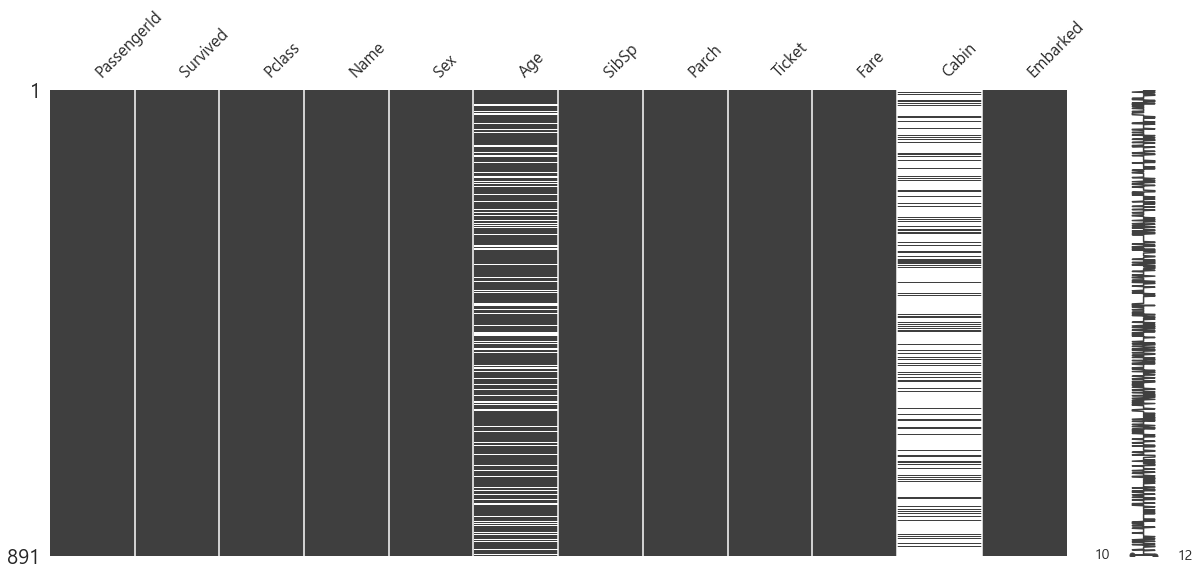

In [106]:
msno.matrix(df_train, figsize = (18, 8))

그래프에 공백의 양에 따라 결측치가 얼마나 많은지를 표현합니다.  
하지만, 몇개의 결측치가 존재하는지 명확하게 파악할 수 없습니다. 

바그래프를 이용해 결측치의 양을 좀 더 명확히 알 수 있습니다.

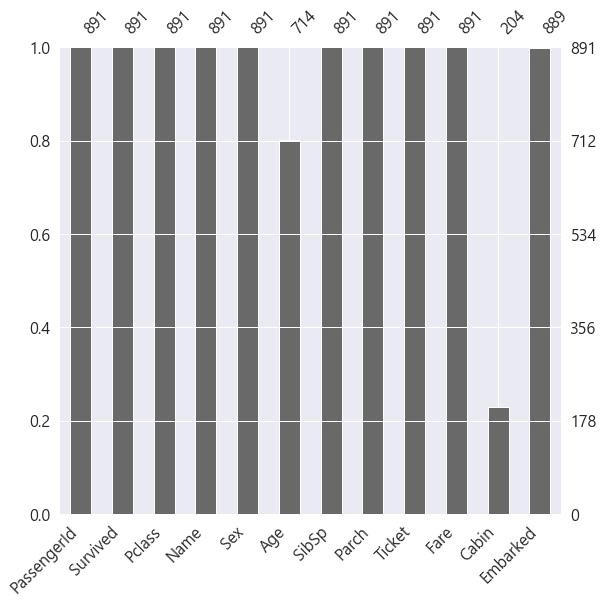

In [107]:
msno.bar(df_train, figsize = (8, 8))

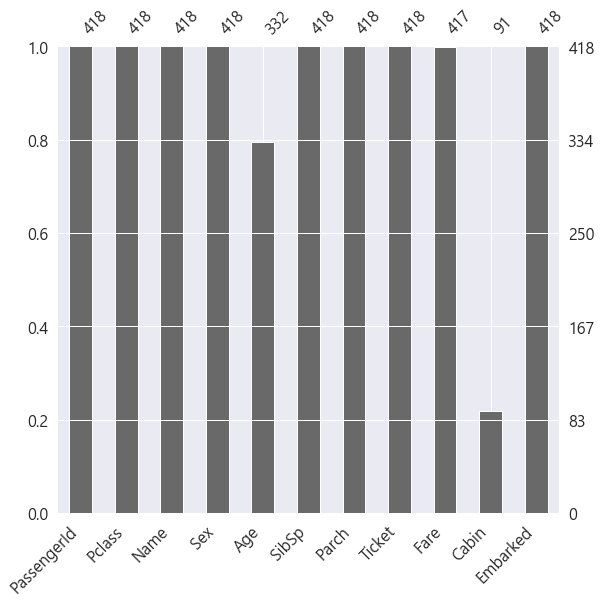

In [108]:
msno.bar(df_test, figsize = (8, 8))

### 1.3 Survived 분포 확인
Survived, 즉 예측하고자 하는 값의 분포를 확인하는 것은 중요합니다.
train의 분포를 확인하고  
후에 test를 예측후 분포를 확인 했을 때  
비슷한 분포를 갖고 있지 않다면 이는 잘못 예측했다는 증거입니다.

또, 한쪽으로만 편중된 데이터가 존재한다면  
데이터 샘플링이 잘 되지 않았다는 증거가 될 수 있습니다.

Text(0.5, 1.0, '사망 vs 생존')

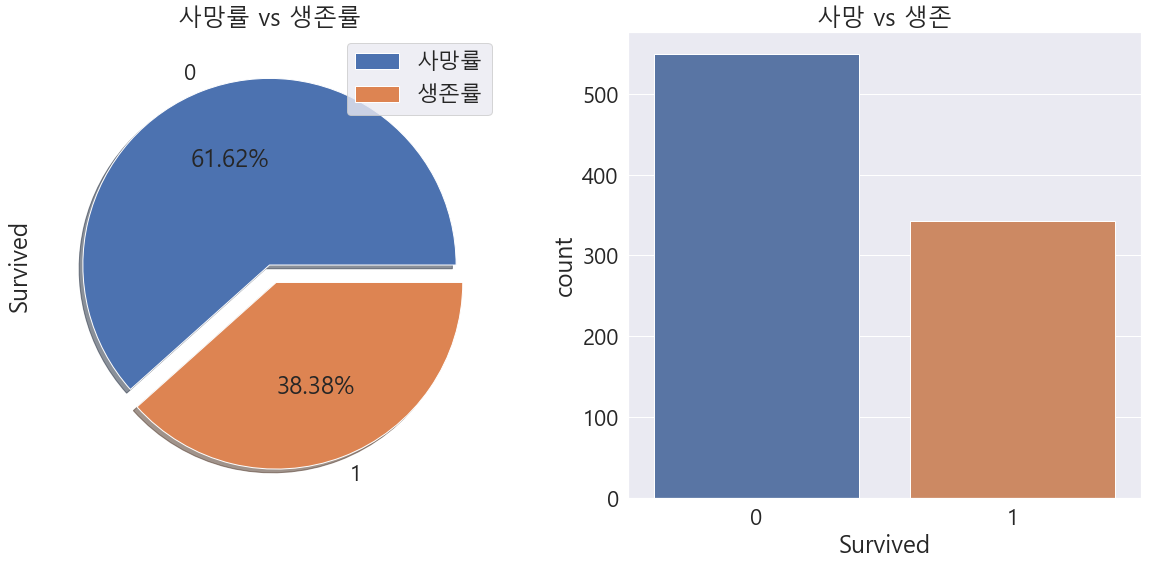

In [210]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived']\
    .value_counts()\
    .plot.pie(explode = (0, 0.1), # pie 그래프가 붙어있는 정도를 표현
              autopct = '%.2f%%', # pie 그래프 안에 소수점 2자리까지 %붙여 표시
              shadow = True, # 그림자 설정
              ax = ax[0])
ax[0].set_title('사망률 vs 생존률')
ax[0].legend(['사망률', '생존률'], loc = 'best')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('사망 vs 생존')

현재 데이터는 앞서 말씀드린 데이터의 분포와 유사합니다.

2200여명 중 1500여명이 사망했다.  
(약 68%는 사망, 32% 생존)

## 2. 탐색적 자료분석(EDA)
탐색적 자료 분석이란  
자신만의 가정을 세우고  
이를 확인해 보는 과정인데요.  
이 과정에서 여러가지 방법들을 사용합니다.  
- 데이터의 구조가 어떻게 되어있는가?
- 변수 간 어떠한 관계가 있는가?
- 데이터에 어떤 규칙이 존재하는가?
- 이상한 값들은 없는가?

위와 같은 과정들을 생각해보며 EDA를 시작해 보겠습니다.

데이터의 속성을 크게 2가지로 나타 낼 수 있습니다.

1. 범주형 변수 : 대상을 몇 가지의 속성으로 분류한 변수
     - 명목형 : 성별, 혈액형과 같은 단순 분류
     - 순서형 : 순서가 있는 변수
2. 수치형 변수 : 숫자로 표시하며, 이산형과 연속형으로 이뤄져있다.
     - 이산형 : 이산적인 값을 갖는 변수
     - 연속형 : 연속적인 값을 갖는 변수

우리가 다루는 데이터에서 변수의 속성을 구분해 보면,  

범주형 변수
- 명목형 : `Sex`, `Name`, `Ticket`, `Cabin`, `Embarked`
- 순서형 : `Pclass`

수치형 변수
- 이산형 : `Sibsp`, `Parch`
- 연속형 : `Age`, `Fare` 

### 2.1 Pclass
`Pclass`변수의 경우 범주형 데이터 입니다.  
우리가 확인 해 볼 사항은  
등급별로 인원수가 어떻게 되고,  
다른 변수들과 어떤 관계가 있는지를 확이해 보는 것입니다.

이 상황에서  
- `Pclass` 가 높으면 생존률이 올라갈까?
- `Pclass`와 `Sex` 간의 관계가 존재 할까?
- `Pclass`에 존재하는 나이 분포는 어떻게 될까?  

와 같은 가정을 하고 진행하면 좋습니다.

먼저 `Pclass`별 인원수를 알아보도록 하겠습니다.

In [36]:
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


`Pclass`별 생존자 수를 알아보면

In [78]:
df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


생존률을 손쉽게 보기 위해  
평균값을 표로 나타내 봅시다.  
값이 0과 1(사망/생존)로 나눠져 있어 평균으로 할 시 생존률이 구해집니다.

In [43]:
df_train[['Pclass', 'Survived']].groupby('Pclass').mean() * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


각 등급의 생존률은  
1등급 : 62.97%  
2등급 : 47.28%    
3등급 : 23.24%  
등급이 높을수록 생존률이 높은 것을 확인할 수 있습니다.  
이를 색깔을 이용하여 나타낸다면

In [110]:
(pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)
             .style
             .background_gradient(cmap = 'autumn_r'))

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


생존률 그래프를 bar형식으로 나타내면

Text(0, 0.5, 'percent')

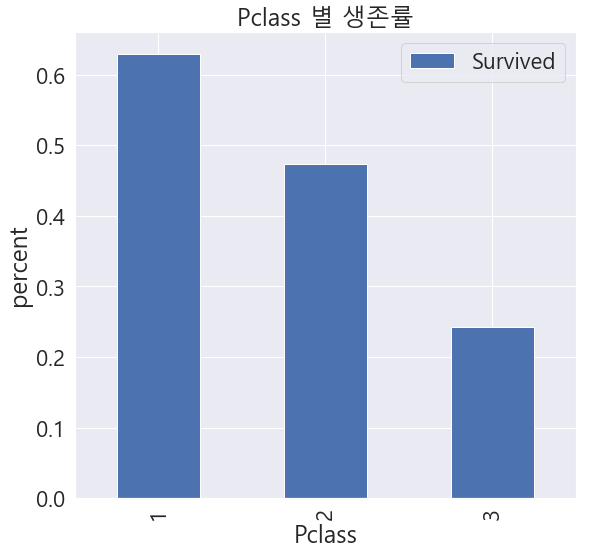

In [128]:
f, ax = plt.subplots(figsize = (8, 8))
df_train[['Pclass', 'Survived']]\
    .groupby('Pclass')\
    .mean()\
    .plot.bar(ax = ax)
ax.set_title('Pclass 별 생존률')
ax.set_ylabel('percent')

sns를 이용하여 생존자 수와 생존자 수를 같이 나타낼 수도 있습니다.

Text(0, 0.5, 'count')

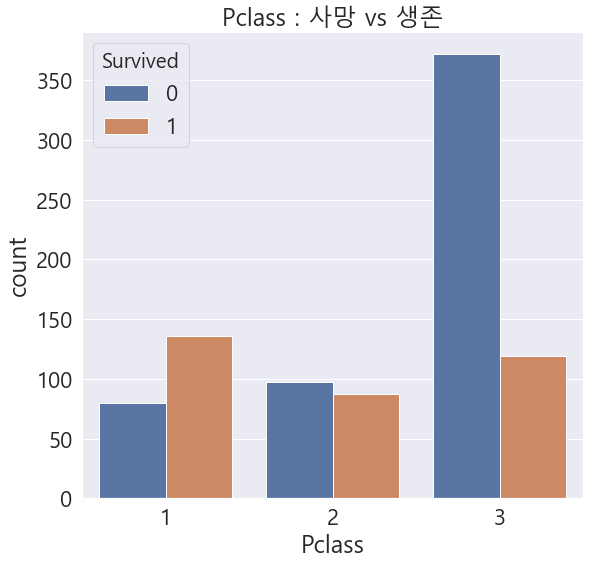

In [129]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.countplot('Pclass', hue = 'Survived', # hue = '변수' : 변수 기준으로 나눔
              data = df_train, ax = ax)
ax.set_title('Pclass : 사망 vs 생존')
ax.set_ylabel('count')

### 2.2 Sex
`Sex`의 분포를 확인하고  
생존률을 알아보도록 하겠습니다.

In [136]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)\
            .style.background_gradient(cmap = 'spring_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Text(0.5, 1.0, '성별 간 생존/사망 수')

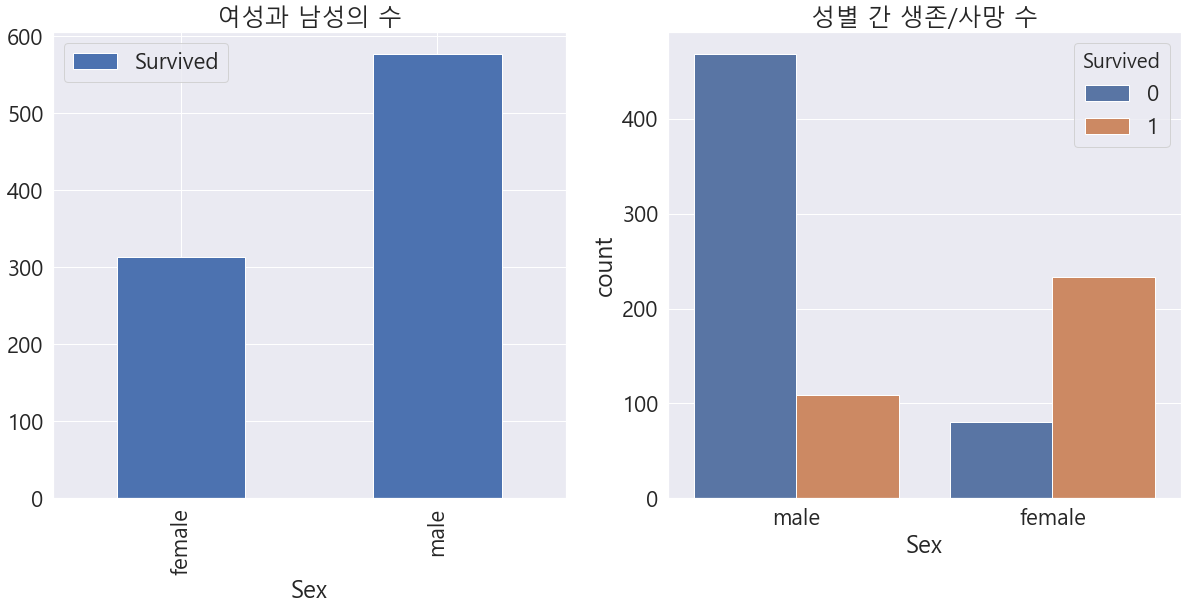

In [137]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
(df_train[['Sex', 'Survived']]
         .groupby('Sex')
         .count()
         .plot.bar(ax = ax[0]))
ax[0].set_title('여성과 남성의 수')
sns.countplot('Sex', hue = 'Survived',
              data = df_train, ax = ax[1])
ax[1].set_title('성별 간 생존/사망 수')

In [142]:
df_train[['Sex', 'Survived']].groupby('Sex').mean() * 100

,Survived
Sex,
female,74.203822
male,18.890815


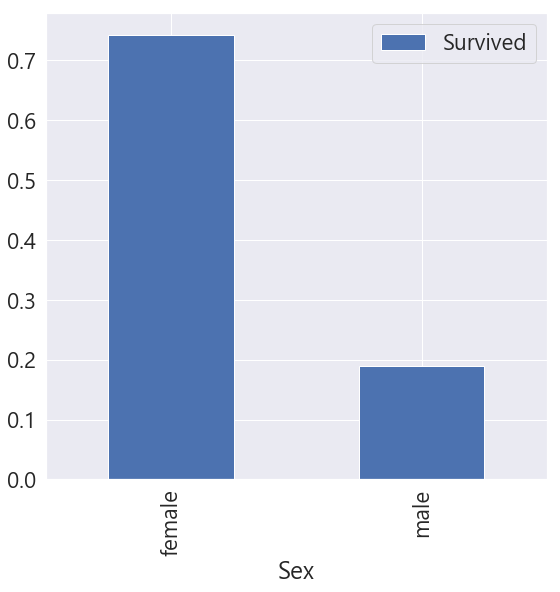

In [140]:
f, ax = plt.subplots(figsize = (8, 8))
(df_train[['Sex', 'Survived']]
     .groupby('Sex')
     .mean()
     .plot.bar(ax = ax))

남성 탑승객 : 549명  
여성 탑승객 : 342명
남성 탑승객이 여성 탑승객 보다 인원이 많지만,  
여성의 생존률은 약 74.20% 남성의 경우는 약 18.89% 입니다.

이는 여성을 우선적으로 생존할 수 있도록 도운 것으로 보입니다.

### 2.3 Pclass와 Sex
`Pclass`와 `Sex`간 분포와 생존률을 확인해 보도록 하겠습니다.

In [168]:
(pd.crosstab([df_train.Sex, df_train.Survived],
             df_train.Pclass, margins = True)
             .style.background_gradient(cmap = 'summer_r'))

In [178]:
(df_train[['Pclass', 'Sex', 'Survived']]
         .groupby(['Pclass', 'Sex'])
         .mean()) * 100

Survived
Pclass Sex              
1      female  96.808511
       male    36.885246
2      female  92.105263
       male    15.740741
3      female  50.000000
       male    13.544669

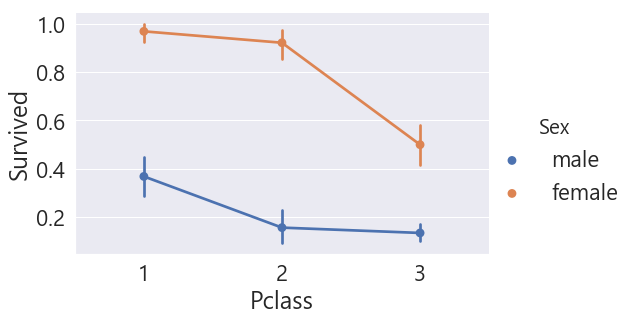

In [176]:
sns.factorplot('Pclass', 'Survived',
               hue = 'Sex', data = df_train, 
               size = 5, aspect = 1.5)

`Pclass`가 높고, `Sex`가 여성 경우 가장 생존률이 높았습니다.  
3등급인 여성(50%)조차 1등급의 남성(36.89%)보다 생존률이 높았습니다.  
이는 성별 변수가 생존률에 크게 영향을 미침을 알 수 있습니다.

### 2.4 Age
이번에는 `Age`의 분포와 생존률을 확인하도록 하겠습니다.

In [150]:
print('최소 나이 :', min(df_train['Age']),'세')
print('최대 나이 :', max(df_train['Age']),'세')
print('평균 나이 :', np.mean(df_train['Age']),'세')

최소 나이 : 0.42 세
최대 나이 : 80.0 세
평균 나이 : 29.69911764705882 세


갓난아이부터 80세 어르신까지  
다양한 연령대의 사람들이 탑승하고 있습니다.

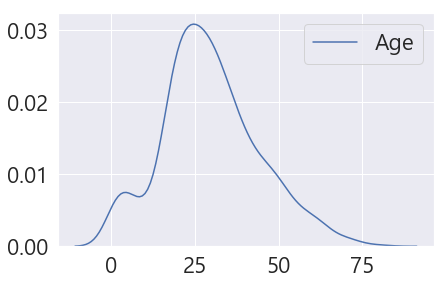

In [151]:
sns.kdeplot(df_train['Age'])

나이의 분포를 보게 되면  
많은 사람들이 20~30대 임을 알 수 있습니다.

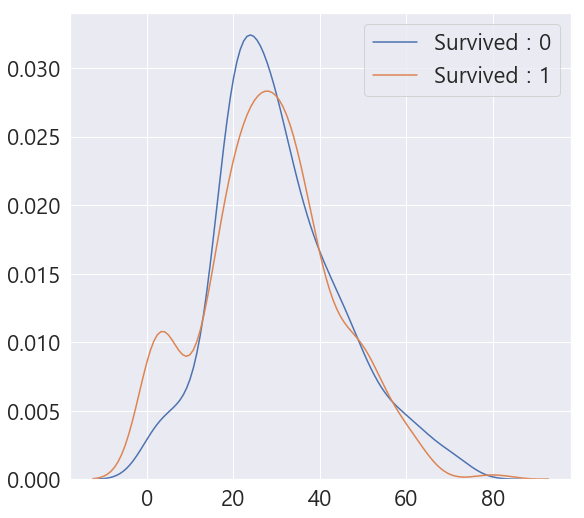

In [157]:
f, ax = plt.subplots(figsize = (8, 8))
for i in range(2):
    sns.kdeplot(df_train.loc[df_train['Survived'] == i, 'Age'], ax = ax)
plt.legend(['Survived : 0', 'Survived : 1'])

생존자의 분포를 보게되면  
어린 나이의 사람들이 많이 생존할 것을 알 수 있습니다.

### 2.5 Pclass, Sex 와  Age

각 분포를 보기 위해  
viloinplot을 이용해 나타내 보겠습니다.

Text(0.5, 1.0, 'Sex and Age vs Survived')

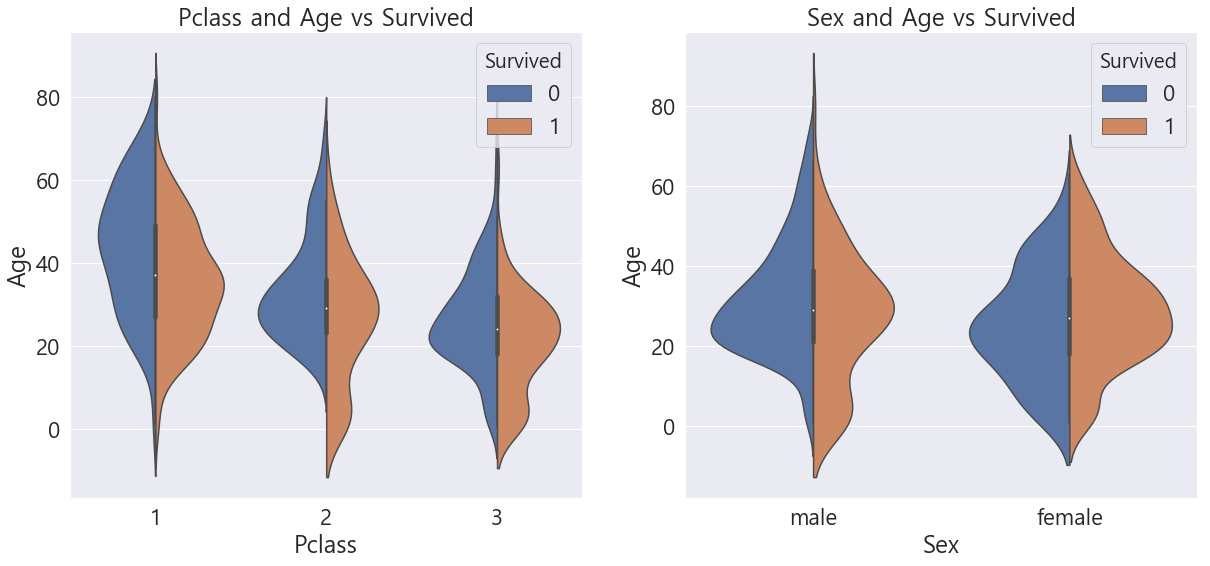

In [212]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived',
               data = df_train,
               split = True, # False시 두개의 분포를 따로 나타냄
               ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot('Sex', 'Age', hue = 'Survived',
               data = df_train,
               split=True,
               ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')

첫 번째 그래프는  
`Pclass`별로 `Age`가 변화함에 따라 생존 여부가 어떻게 달라지는지 나타내고 있습니다.

두 번째 그래프는
`Sex`별로 `Age`가 변화함에 따라 생존 여부가 어떻게 달라지는 지를 나타냅니다.

1. `Pclass`와 관계 없이 나이가 어릴수록 생존이 높은 것을 확인 할 수 있습니다.  
2. `Pclass`1인 구간에서는 20~40대 구간의 사람들이 생존이 높았습니다.

다음으로는  
Pclass별로 나이의 분포가 어떻게 돼 있는지 확인해 보도록하겠습니다.

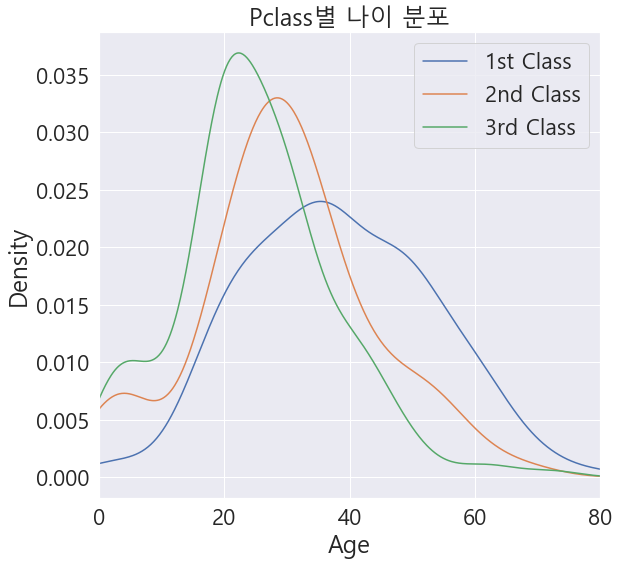

In [275]:
plt.figure(figsize = (8, 8))
for i in range(1,4):
    df_train.loc[df_train['Pclass'] == i, 'Age'].plot(kind = 'kde')
plt.xlabel('Age')
plt.xlim(0, 80)
plt.title('Pclass별 나이 분포')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

x축 구간을 0에서 80까지만 제한 하여 본다면  
1등석에는 20~50대의 사람들이 많고  
2등석에는 약 10대 이하, 20대 중반~ 30대 중반의 사람들이 많고
3등석에는 약 10대 이하, 20대 초반 ~ 30대 초반의 사람들이 많았다.

`Pclass`의 등급이 높아질수록 높은 연령대의 사람들이 많았고,  
낮은 등급의 사람들에선 나이거 비교적 젊은 사람들이 많았다.

나이대가 높아질수록 생존률이 어떻게 변화하는지 알기 위해 누적확률을 이용해 표현해 보았다.

Text(0.5, 0, 'Age')

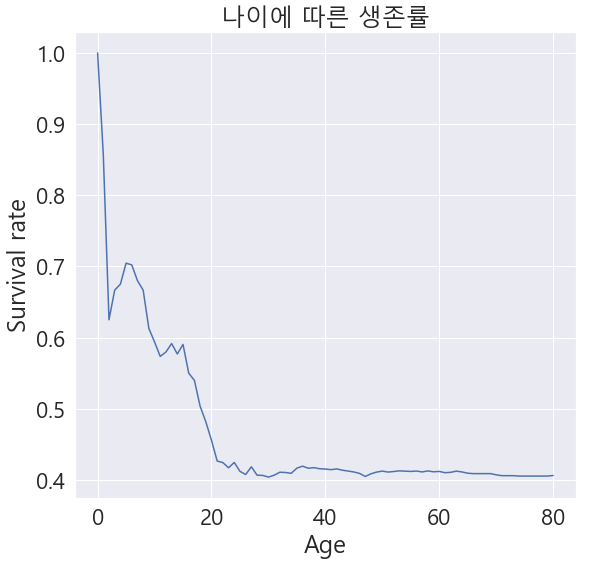

In [224]:
cum_rate = []
for i in range(1, 82): # 최소 나이가 1살보다 적고, 최대 나이가 80이므로 80을 포함할 수 있는 82까지 설정
    cum_rate\
    .append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize = (8, 8))
plt.plot(cum_rate)
plt.title('나이에 따른 생존률', y = 1)
plt.ylabel('Survival rate')
plt.xlabel('Age')

나이가 어릴수록 생존률이 크게 향상된 다는 것을 확인했습니다.  
후에 `Age`, `Pclass`, `Sex`가 생존여부를 예측하는데 큰 도움이 될 것으로 보입니다.

### 2.6 Embarked
`Embarked`는 탑승한 항구를 나타냅니다.  
위에서 확인한 바로는 3개의 항구가 나타나 있었습니다.

`Embarked`의 분포를 표현해보고  
생존률을 확인해 보도록 하겠습니다.

In [244]:
(pd.crosstab(df_train['Embarked'],
             df_train['Survived'],
             margins = True)
            .style.background_gradient(cmap = 'winter_r'))

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [245]:
(df_train[['Embarked', 'Survived']]
        .groupby('Embarked').mean()) * 100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


Text(0.5, 1.0, '항구 별 생존률')

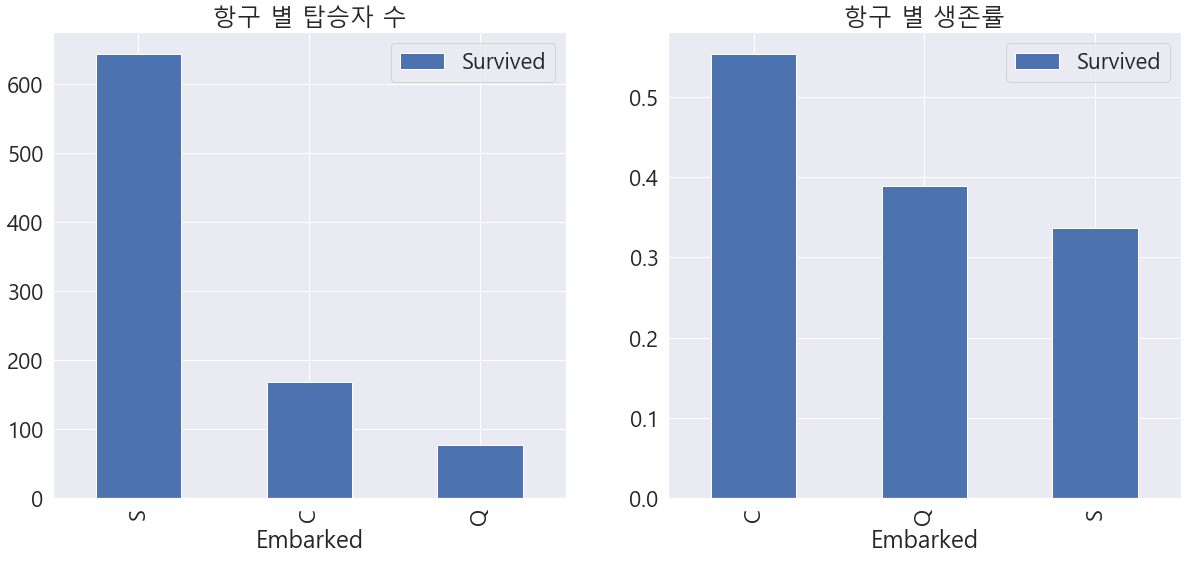

In [230]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
(df_train[['Embarked', 'Survived']]
         .groupby('Embarked')
         .count()
         .sort_values(by = 'Survived', ascending = False) # Survived를 내림차순으로 정렬
         .plot.bar(ax = ax[0]))
ax[0].set_title('항구 별 탑승자 수')
(df_train[['Embarked', 'Survived']]
         .groupby('Embarked')
         .mean()
         .plot.bar(ax = ax[1]))
ax[1].set_title('항구 별 생존률')

S 항구에서 사람들이 가장 많이 탔으나  
생존률이 가장 높은 것은 C 항구(55.38%) 였습니다.

In [248]:
(pd.crosstab([df_train.Embarked, df_train.Pclass],
             [df_train.Sex, df_train.Survived], margins = True)
             .style.background_gradient(cmap='summer_r'))

S 항구 `Pclass` 3을 제외하곤  
모든 항구와 등급에서 여성의 생존의 두드러지게 낮았습니다.  
남성의 경우 위에서 알아본 사실처럼   
3등급에서 가장 큰 사망률을 보입니다.

다음은 Embarked와 다른 변수들간의 상관을 보겠습니다.

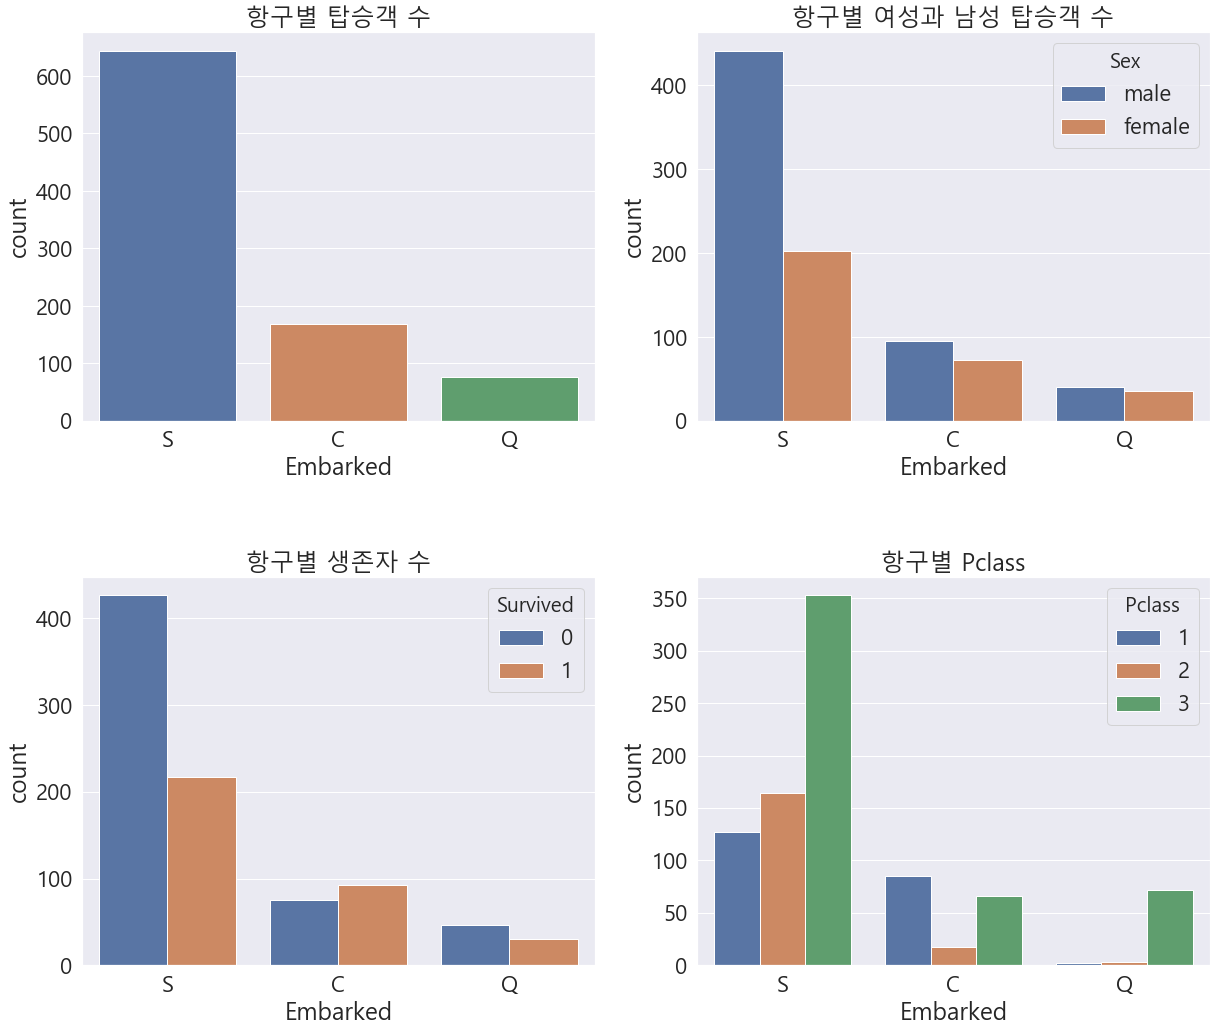

In [267]:
f, ax = plt.subplots(2, 2, figsize = (18, 16))
sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[0, 0].set_title('항구별 탑승객 수')
ax[0, 1].set_title('항구별 여성과 남성 탑승객 수')
ax[1, 0].set_title('항구별 생존자 수')
ax[1, 1].set_title('항구별 Pclass')

plt.subplots_adjust(wspace = 0.2, # 그래프 간 넓이 조정
                    hspace = 0.4) # 그래프 간 높이 조정

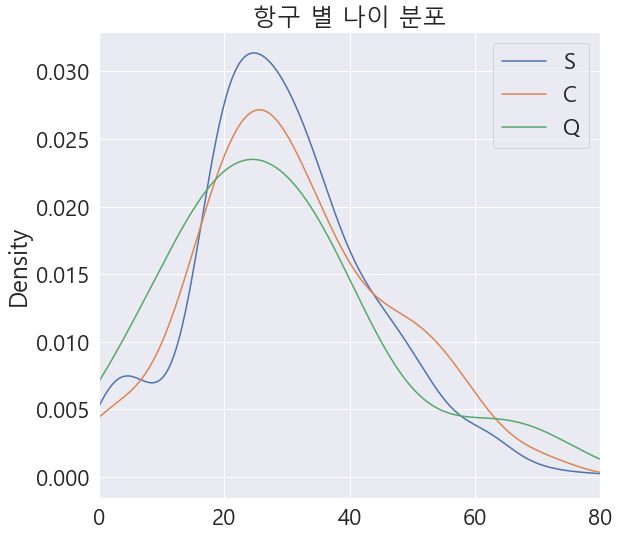

In [284]:
plt.figure(figsize = (8, 8))
labels = ['S', 'C', 'Q']
for i in labels:
    df_train.loc[df_train['Embarked'] == i, 'Age'].plot(kind = 'kde')
plt.title('항구 별 나이 분포')
plt.xlim(0, 80)
plt.legend(labels)

각각의 그래프를 통해 알 수 있는 점은
1. S 항구에서 탑승한 사람들의 수가 가장 많습니다.  

2. S 항구에서 남성의 비율이 다른 항구보다 월등히 높습니다.  
   다른 항구들은 남녀의 비율이 비슷합니다.  
   
3. S 항구는 남성의 비율이 높은 만큼 사망률도 높습니다.  
   반면에 Q 항구의 경우 여성의 비율이 높지만 생존률은 그보다 낮습니다.  
   C 항구의 경우 남성의 비율이 조금 높지만 생존률은 그보다 더 높습니다.  
   
4. `Pclass`를 나눠 확인했을 때  
   C 항구의 높은 생존률은 인원수 대비 클래스가 높은 사람들의 비율이 높아서 입니다.  
   반면에, Q 항구의 경우 3등급의 인원이 많지만 현격히 낮은 생존률을 보여주지 않는다.  
   이는 다른 항구들의 여성 비율이 높고, 나이가 어린 여성들이 많이 분포해  
   우선적으로 구출된 것으로 보인다.

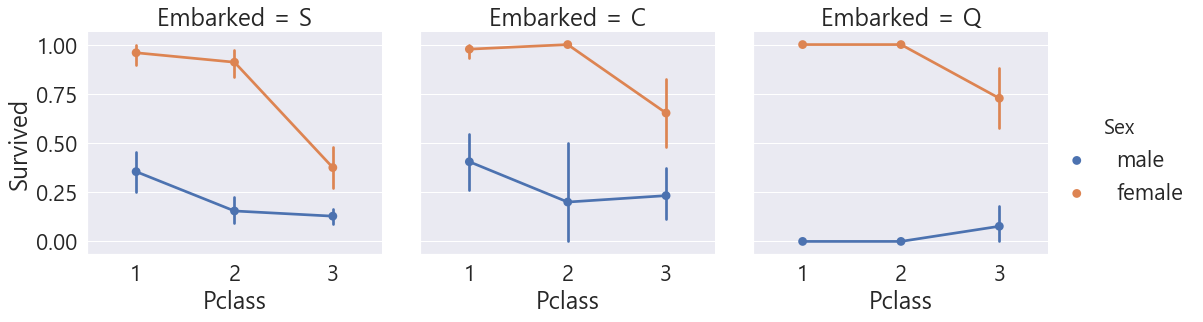

In [279]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = df_train)

C 항구와 Q 항구의 여성들의 생존률이 높으며  
또한 Q 항구 `Pclass` 3등급 여성의 생존률 또한 다른데에 비해 높다.  
이는 앞서 언급했던 나이가 어린 탑승객들의 구출을 우선으로 했기때문으로 보인다.

### 2.7 SibSp
이 변수는 혼자 탑승했는지 아니면 가족 구성원들과 함께 탑승했는지를 나타낸다. 

Sibling(Sib) = 형제/자매, 이복형제  
Spouse(Sp) = 배우자  
를 의미한다.

In [286]:
(pd.crosstab([df_train.SibSp], df_train.Survived)
        .style.background_gradient(cmap='summer_r'))

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


대부분의 사람들이 혼자 탑승하거나 1명과 같이 탑승했다.

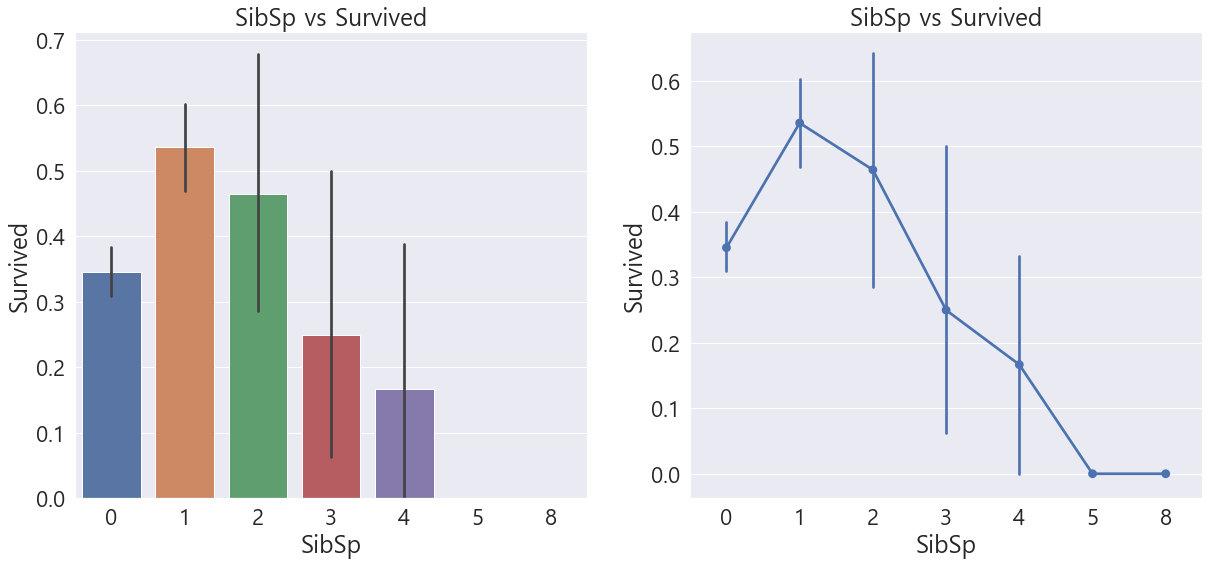

In [293]:
f , ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot('SibSp', 'Survived', data = df_train, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)

In [296]:
(pd.crosstab(df_train.SibSp, df_train.Pclass, margins = True)
    .style.background_gradient(cmap = 'summer_r'))

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


혼자 탑승했을 경우 생존률이 40%보다 낮지만,  
1명 또는 2명(이는 편차가 크긴 함)일 경우 생존률이 높아지는 경향을 보입니다.  
이는 `Pclass`가 1등급과 2등급 합 대비 3등급 비율을 가장 높은 순서대로 나열하면  
1명, 2명, 0명 순으로 생존률이 높음을 알 수 있습니다.  
반면 생존률이 3명부터는 낮아지는데 이는 3등급 비율이 높거나 모두 3등급인 경우이기 때문입니다.

여기서도 `Pclass`가 높을 수록 생존에 유리하다는 것을 알 수 있습니다.

### 2.8 Parch
이 변수는 혼자 탑승했는지 아니면 가족 구성원들과 함께 탑승했는지를 나타낸다.

Parents(Par) = 부모님
Children(ch) = 자녀들
를 의미한다.

In [316]:
(pd.crosstab(df_train['Parch'], df_train['Pclass'])
    .style.background_gradient(cmap = 'RdBu'))

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


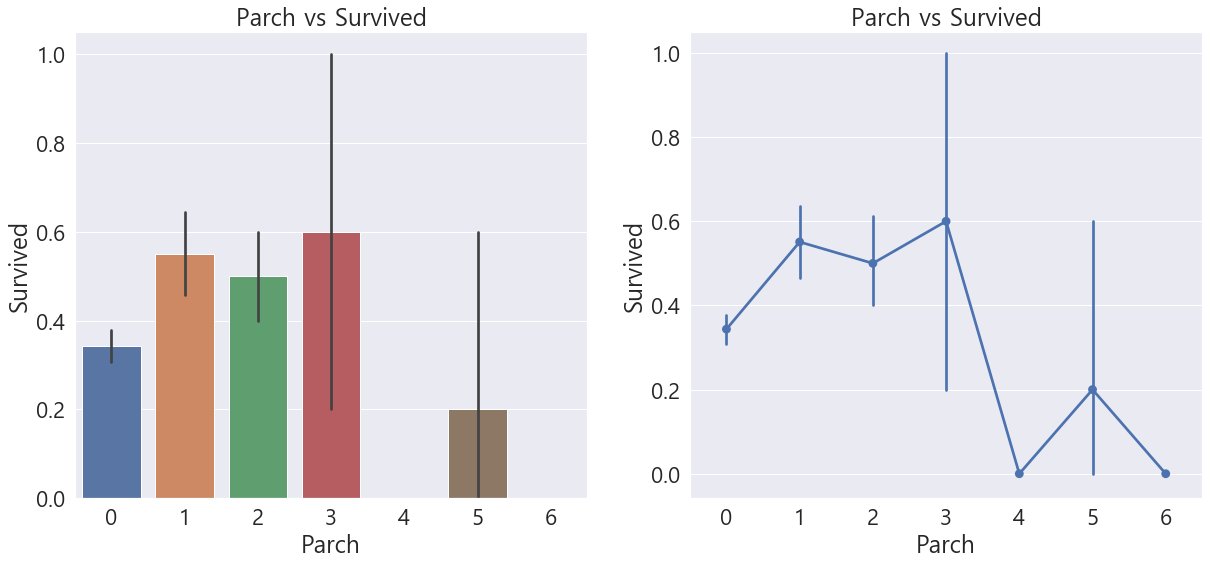

In [317]:
f , ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot('Parch', 'Survived', data = df_train, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)

결과는 SibSp와 상당히 비슷합니다.  
혼자 보다는 부모님 또는 자식과 탑승한 승객들이 생존 가능성이 더 높습니다.  
하지만, 일정 수준에선 또 감소합니다.  

### 2.9 Fare
탑승요금을 알아보는 단계입니다.

In [311]:
print('가장 비싼 탑승료:', df_train['Fare'].max())
print('가장 싼 탑승료:', df_train['Fare'].min())
print('평균 탑승료:', df_train['Fare'].mean())

가장 비싼 탑승료: 512.3292
가장 싼 탑승료: 0.0
평균 탑승료: 32.2042079685746


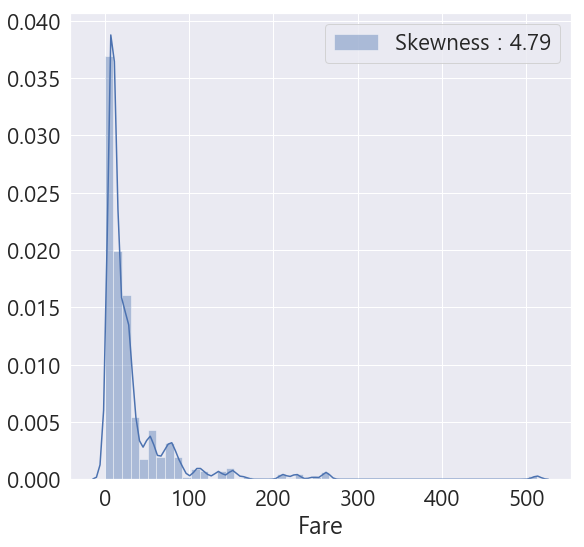

In [321]:
f, ax = plt.subplots(figsize = (8, 8))
(sns.distplot(df_train['Fare'], color = 'b',
             label = 'Skewness : {:.2f}'       # skewnsee는 왜도
             .format(df_train['Fare'].skew()),
              ax = ax))
ax.legend()

 왜도는 분포의 비대칭정도를 보는 척도입니다.
 - 왜도 = 0 : 좌우 대칭
 - 왜도 < 0 :  왼쪽 꼬리가 긴 그래프 
 - 왜도 > 0 :  오른쪽 꼬리가 긴 그래프  

왜도가 4.79로 상당히 치우쳐진 그래프입니다.
이를 그대로 사용할 경우 값을 예측하는 데 큰 영향을 미칠 수 있으므로  
후에 수정하도록 하겠습니다.

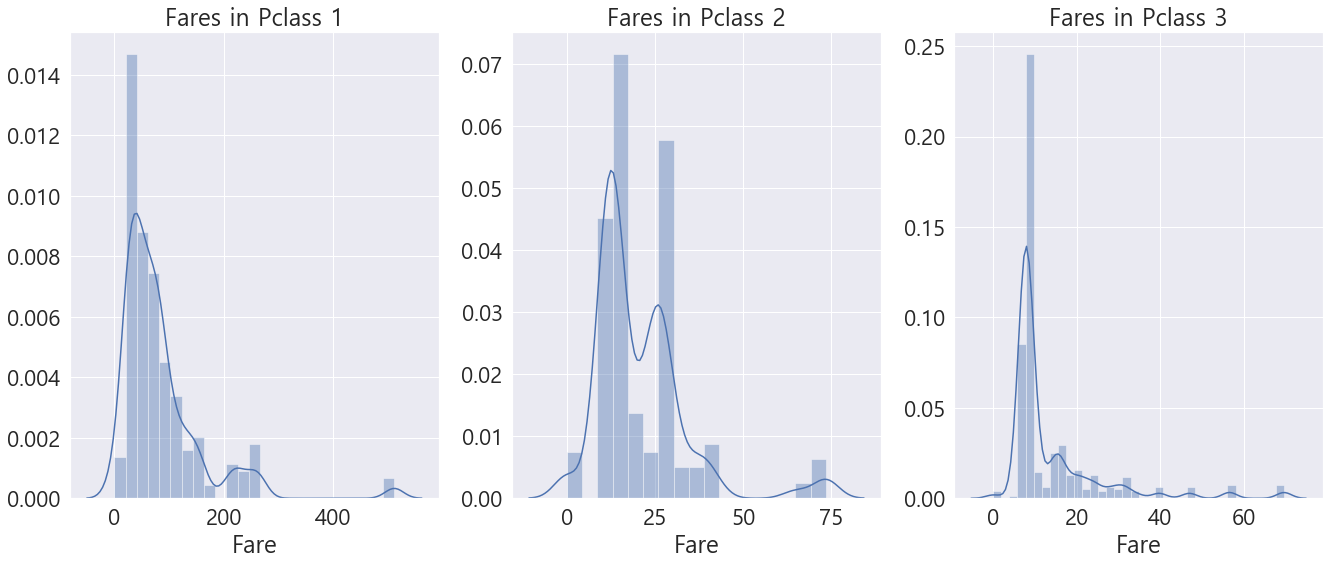

In [325]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
for i in range(3):
    sns.distplot(df_train.loc[df_train['Pclass'] == i+1].Fare, ax = ax[i])
ax[0].set_title('Fares in Pclass 1')
ax[1].set_title('Fares in Pclass 2')
ax[2].set_title('Fares in Pclass 3')

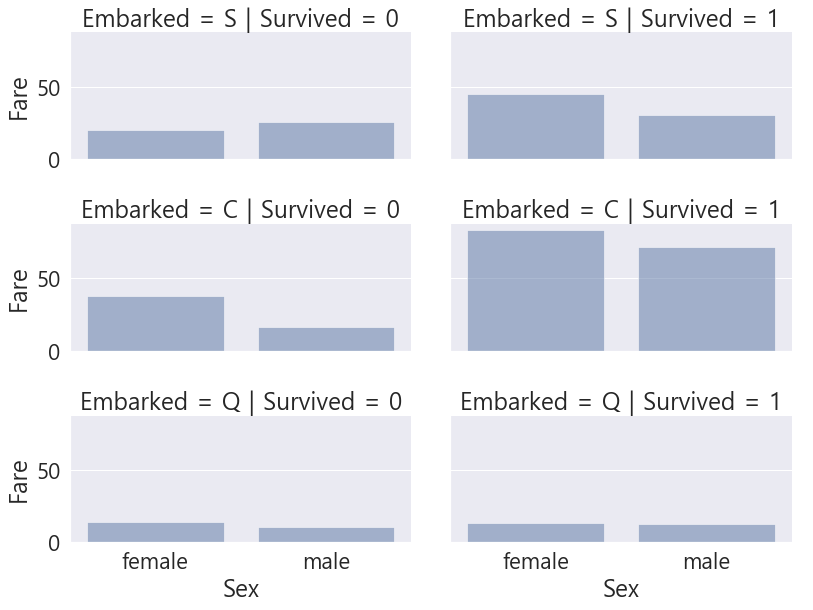

In [328]:
(sns.FacetGrid(df_train, row='Embarked', col='Survived', size = 3, aspect = 1.9)
    .map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
    .add_legend())

`Pclass`가 높을 수록 `Fare`의 범위가 넓어진다.  
또한, 이를 `Embarked`와 `Survived` 변수와 비교했을 때  
전반적으로 여성의 `Fare`가 더 높았으며  
높은 탑승료를 낸 만큼 생존에 유리한 방과 서비스를 대접 받아 생존이 유리한 것으로 예상된다.

P클래스1의 승객 요금에 많은 분배가 있을 것으로 보이며, 이 분배가 기준이 감소함에 따라 계속 감소하고 있습니다. 이 또한 지속적이기 때문에, 우리는 이너닝을 사용하여 별개의 값으로 변환할 수 있습니다.

모든 피쳐에 대한 Nutsheell의 관측치입니다.
섹스:남성에 비해 여성의 생존 가능성은 높습니다.

P클래스:1등 승객이 되면 생존 가능성이 더 높아진다는 뚜렷한 추세가 있습니다. P클래스3의 생존율은 매우 낮습니다. 여성의 경우, Pclass1의 생존 가능성은 거의 1이고 Pclass2의 생존 가능성도 높습니다. 돈이 이겼어요!!!

나이: 5-10세 미만의 어린이들은 생존 가능성이 높습니다. 15세에서 35세 사이의 승객들이 많이 죽었습니다.

다음이 포함됩니다. 이것은 매우 흥미로운 특징입니다. 대부분의 P클래스1 승객들이 S클래스3에서 일어났음에도 불구하고 C클래스에서의 생존 가능성은 더 나아 보입니다.

파치+시브스프: 형제자매 1-2명, 형제자매 1-3명, 부모 1-3명씩을 갖는 것은 혼자이거나 대가족이 함께 여행하는 것보다 확률의 더 큰 가능성을 보여준다.

### 2.10 Correlation

df_train.drop('PassengerId', axis = 1, inplace = True)
df_test.drop('PassengerId', axis = 1, inplace = True)